<h1 style="text-align:left;font-size:200%;;">Présentation sur les réseaux de neurones </h1>
<h4 style="text-align:left;"> Realise par :Khaoula ENFIFAKH  </h4>
<h4 style="text-align:left;"> Propose par : Pr. Abdellah AZMANI </h4>

# 1- réseau de neurones definition 


    Un réseau de neurones est un modèle mathématique composé de plusieurs neurones interconnectés. Inspiré par la structure du cerveau biologique, un réseau de neurones artificiels est conçu pour apprendre à partir des données et effectuer des tâches telles que la classification, la régression, etc.

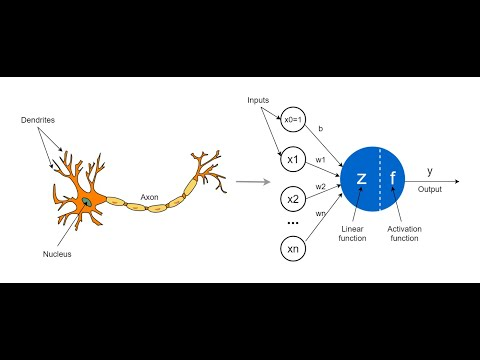


## Importation des bibliothèques nécessaires


In [1]:
# numpy est une bibliothèque utilisée pour les opérations numériques
import numpy as np

# Matplotlib.pyplot est une bibliothèque utilisée pour créer des graphiques et a visualisation des données
import matplotlib.pyplot as plt

# La fonction make_blobs de sklearn.datasets est utilisée pour générer des ensembles de données synthétiques 
# pour des tâches de clustering et de classification
from sklearn.datasets import make_blobs


## Dataset

    Pour développé un programme de neurone artificiel Nous allons partir d'un dataset (X,y) de 100 lignes et 2 colonnes

    Cette dataset représente des plantes avec la longueur et la largeur de ses feuilles , Et notre but c'est d'entraîner un neurone artificiel à reconnaître les plantes toxiques et les plantes non toxiques grace à ses données de référence



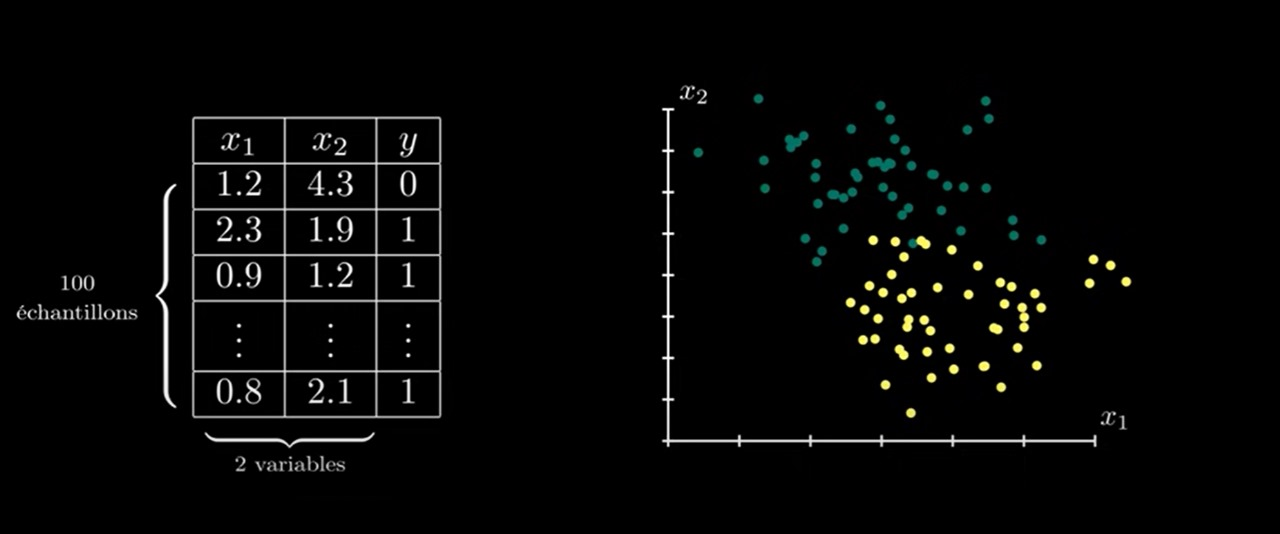

dimensions de X: (100, 2)
dimensions de y: (100, 1)


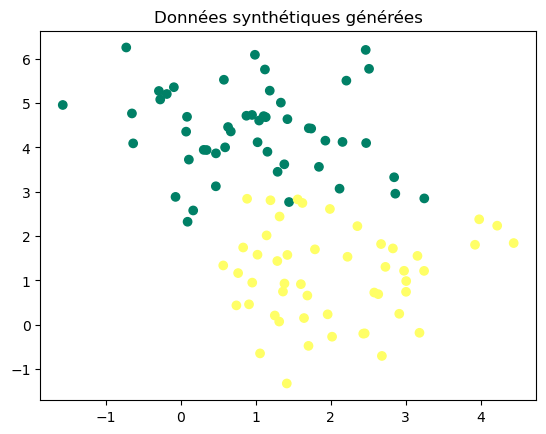

In [2]:
# Génération de données synthétiques avec make_blobs
# - n_samples : Nombre total d'échantillons générés, répartis uniformément entre les classes.
# - n_features : Nombre de caractéristiques pour chaque échantillon.
# - centers : Nombre de centres à générer ou les centres des groupes.
# - random_state : Contrôle la reproductibilité des données générées.
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)

# Remodelage de y pour s'assurer qu'il a la forme attendue
y = y.reshape((y.shape[0], 1))

# Affichage des dimensions de X et y
print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

# Affichage des données synthétiques à l'aide de matplotlib
plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.title('Données synthétiques générées')  # Ajout d'un titre au graphique
plt.show()

## Fonctions du modele

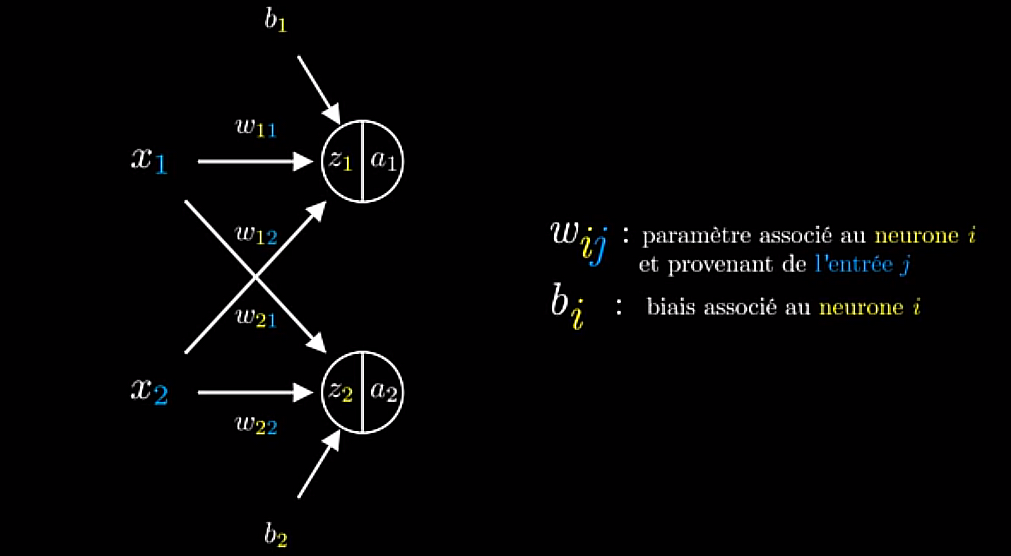

  
    Initialise les poids et le biais du modèle de réseau de neurones de manière aléatoire.
    

In [3]:

def initialisation(X):
    
    # Initialise les poids (W) et le biais (b) 
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    
    return (W, b)


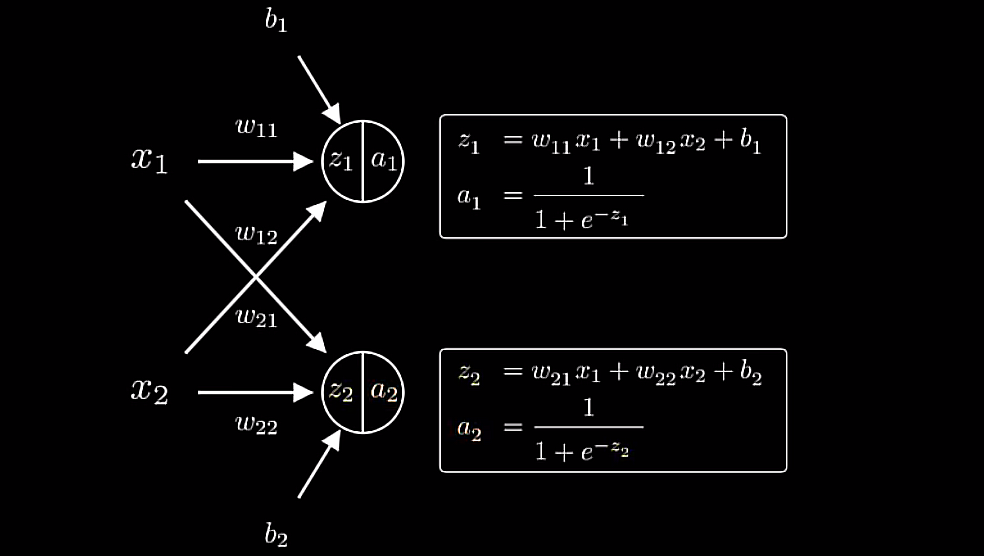

     Calcule la sortie du modèle de réseau de neurones pour un ensemble d'entrée donné.
    

In [4]:
def model(X, W, b):
    
    # Calcule l'activation pondérée
    Z = X.dot(W) + b
    
    # Applique la fonction d'activation sigmoïde pour obtenir les probabilités
    A = 1 / (1 + np.exp(-Z))
    return A

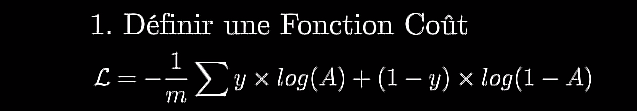

    Calcule la perte logarithmique (log loss) est une fonction de coût couramment utilisée en classification pour évaluer les performances d'un modèle

In [5]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

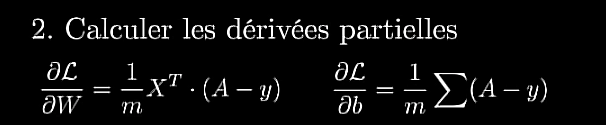

 Calcule les gradients de la fonction de perte pour comprendre comment la fonction de coût évalue les différents paramètres W et b (poids et biais).
 

In [6]:
def gradients(A, X, y):
    
    # Calcul des gradients par rapport aux poids
    dW = 1 / len(y) * np.dot(X.T, A - y)
    
    # Calcul du gradient par rapport au biais
    db = 1 / len(y) * np.sum(A - y)
    
    return (dW, db)

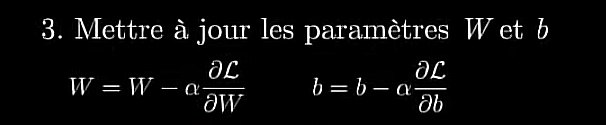

Met à jour les poids et le biais du modèle pour minimiser la fonction de coût grâce à la descente de gradients.


In [7]:
def update(dW, db, W, b, learning_rate):
   
    # Mise à jour des poids
    W = W - learning_rate * dW
    
    # Mise à jour du biais
    b = b - learning_rate * db
    return (W, b)

In [8]:
def predict(X, W, b):
        
    # Calcule les probabilités d'appartenance à la classe positive
    A = model(X, W, b)
    
    # Prédit la classe en fonction du seuil de 0.5
    return A >= 0.5

In [9]:
# Importation de la fonction accuracy_score de la bibliothèque sklearn.metrics
# Cette fonction est utilisée pour calculer la précision d'un modèle de classification en comparant les valeurs prédites aux valeurs réelles.
from sklearn.metrics import accuracy_score


      Entraîne un neurone artificiel sur les données d'entrée (X) et les étiquettes de classe (y).

In [10]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X)

    # Liste pour stocker les valeurs de perte pour chaque itération
    Loss = []
    
    # Boucle d'entraînement
    for i in range(n_iter):
        # Calcul des prédictions du modèle
        A = model(X, W, b)
        # Calcul de la perte et ajout à la liste Loss
        Loss.append(log_loss(A, y))
        # Calcul des gradients
        dW, db = gradients(A, X, y)
        # Mise à jour des poids et du biais
        W, b = update(dW, db, W, b, learning_rate)

    # Prédiction finale sur les données d'entraînement    
    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.xlabel('Nombre d\'itérations')
    plt.ylabel('Perte')
    plt.title('Évolution de la perte au cours de l\'entraînement')
  
    plt.show()

    return (W, b)
    

0.87


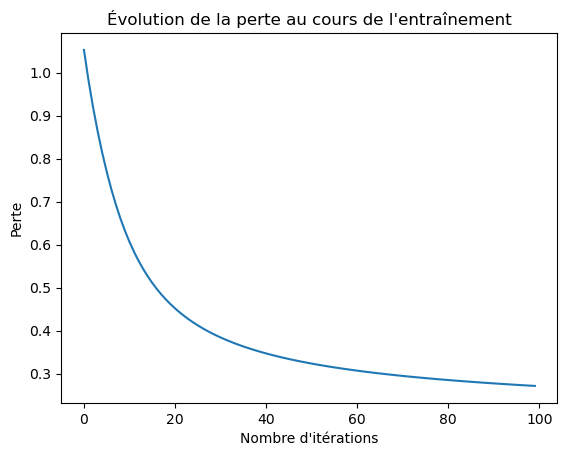

In [11]:
# Entraînement du neurone artificiel et récupération des poids et du biais entraînés
W, b = artificial_neuron(X, y)

## Frontiere de décision

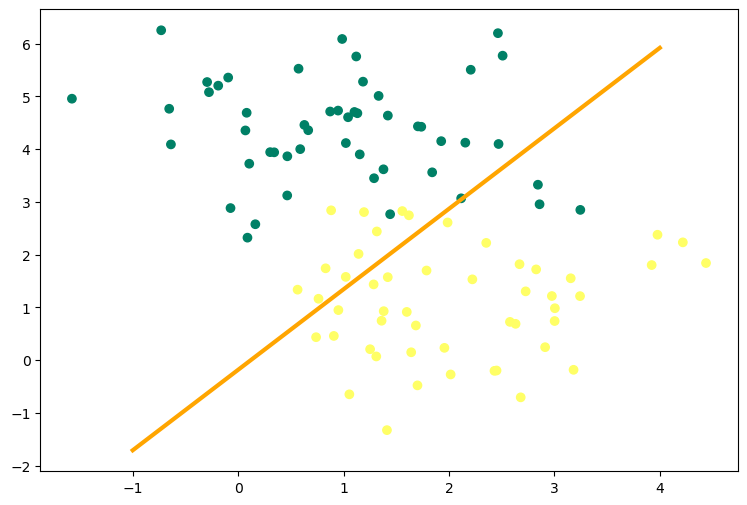

In [12]:
# Crée une nouvelle figure et un axe avec une taille de 9x6 pouces
fig, ax = plt.subplots(figsize=(9, 6))

# Affiche les points de données avec des couleurs selon les étiquettes de classe
ax.scatter(X[:,0], X[:, 1], c=y, cmap='summer')

# Génère les coordonnées x2 en fonction des coordonnées x1, basées sur l'équation du plan défini par les poids et le biais entraînés
x1 = np.linspace(-1, 4, 100)
x2 = ( - W[0] * x1 - b) / W[1]

# Trace la frontière de décision (ligne de séparation) sur le graphique
ax.plot(x1, x2, c='orange', lw=3)